In [7]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchdiffeq import odeint

from scipy.fftpack import fft, ifft,fftshift
from tqdm.notebook import tqdm

plt.style.use(['science','nature','notebook'])


zeta2 = torch.Tensor([1.0*10e-7])
zeta1 = torch.Tensor([4.0*10e-2])
omega0 = torch.Tensor([2])
omegas = torch.Tensor([0])
Omega_r = torch.Tensor([0.1])
F = torch.Tensor([0.1])

def dSdt(t,S):
    x1,y1,x2,y2 = S
    x1 = torch.Tensor([S[0]])
    y1 = torch.Tensor([S[1]]) # dx1_dt
    d2x1_dt2 = torch.Tensor([-zeta1*y1-(omega0**2)*x1 +(Omega_r**2)*x2 + (F*np.exp(-1j*omegas*t))])

    x2 = torch.Tensor([S[2]])
    y2 = torch.Tensor([S[3]]) # dx2_dt
    d2x2_dt2 = torch.Tensor([-zeta2*y2-(omega0**2)*x2 +(Omega_r**2)*x1])
    return torch.cat([y1, d2x1_dt2, y2,d2x2_dt2])

In [11]:
t_begin=0.
t_end=8000.
t_nsamples=1000000
t = np.linspace(t_begin, t_end, t_nsamples)

x1_0 = torch.Tensor([0.])
y1_0 = torch.Tensor([0.])
x2_0 = torch.Tensor([0.])
y2_0 = torch.Tensor([0.])
S_0 = torch.cat([x1_0,y1_0,x2_0,y2_0])



x_num_sol = odeint(dSdt, S_0, torch.Tensor(t)).numpy()

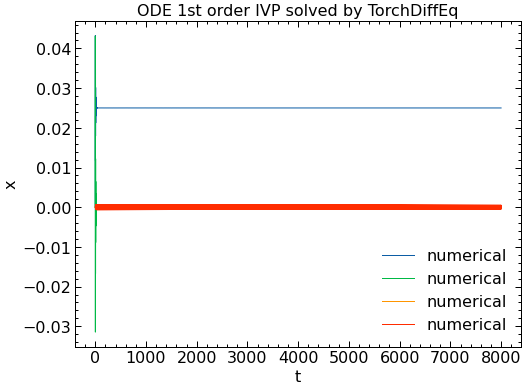

In [12]:
plt.figure()
#plt.plot(t_space, x_an_sol, '--', linewidth=2, label='analytical')
#plt.plot(t, x_num_sol, linewidth=1, label='numerical')
plt.plot(t ,x_num_sol.T[0], linewidth=1, label='numerical')
plt.plot(t, x_num_sol.T[1], linewidth=1, label='numerical')
plt.plot(t, x_num_sol.T[2], linewidth=1, label='numerical')
plt.plot(t, x_num_sol.T[3], linewidth=1, label='numerical')
plt.title('ODE 1st order IVP solved by TorchDiffEq')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

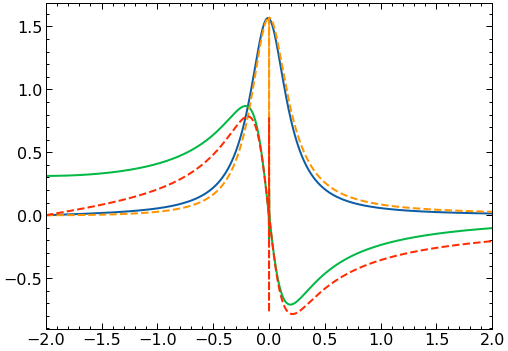

In [16]:
X1 = fft(np.real(x_num_sol.T[1,:]))
N = len(X1)
n = np.arange(N)
#sr = 1000
#T = N/sr
T = t_end
freq = 2*np.pi*n/T

plt.plot(freq-2, np.abs(np.imag(fft(x_num_sol.T[1,:])))/10)

plt.plot(freq-2, np.real(fft(x_num_sol.T[1,:]))/10)

plt.xlim(-2,2)

hz = np.linspace(0,4,t_nsamples)
F = 0.1
w = 2
b = 1.0*10e-7
a = 4.0*10e-2
c1= 0.1
def f(xx,c):
    return (-2*(np.pi)*1j*F*xx*(w**2-xx**2-1j*b*xx))/(((w**2-xx**2-1j*a*xx)*(w**2-xx**2-1j*b*xx))-c**4)
plt.plot(hz-w,np.real(f(hz,c1)), label='Real part', linestyle ='--')
plt.plot(hz-w,-np.imag(f(hz,c1)), label='Imag part', linestyle ='--')

In [18]:
##check gpu or cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu
